In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast


In [2]:
TWO_WORD_NAMES={'Aston martin':'AstonMartin','Alfa Romeo':'AlfaRomeo',
                'Great Wall':'GreatWall','Ineos Grenadier':'IneosGrenadier',
                'Land Rover':'LandRover','Link & Co':'Link&Co','SH auto':'SHauto',
                'SIN CARS':'SINCARS','Ssang yong':'Ssangyong'}

In [3]:
df=pd.concat([pd.read_csv('out_more.csv',index_col=0),pd.read_csv('out.csv',index_col=0)],ignore_index=True).drop_duplicates(subset=['URL'],keep='first')
df

,CarModel,CarDescription,CarPrice,Params,URL,Location,Status,Дата на производствоTech,ДвигателTech,МощностTech,...,Скоростна кутияInfo,Пробег [км]Info,ЕвростандартInfo,Безопасност,Други,Екстериор,Защита,Интериор,Комфорт,Специализирани
0,Alfa Romeo 159 sportwagon Turismo Sport,"Отлично състояние. Всичко напълно обслужено, ...",8 999 лв.,"['юни 2010 г.', '255 000 км', 'Черен', 'Дизело...",www.mobile.bg/obiava-11718893787789300-alfa-ro...,"обл. София, гр. София",TOP,юни 2010,Дизелов,150 к.с.,...,Ръчна,255000 км,NaN,"['Антиблокираща система', 'Въздушни възглавниц...","['Бартер', 'Напълно обслужен', 'С регистрация'...","['4(5) Врати', 'LED фарове', 'Лети джанти', 'Х...","['Аларма', 'Централно заключване']",['Кожен салон'],"['Auto Start Stop function', 'Bluetooth \\ han...",NaN
1,"Alfa Romeo Giulietta ИТАЛИЯ, EVRO 6В",Автомобилът е закупен от Северна Италия от пре...,15 999 лв.,"['октомври 2016 г.', '207 000 км', 'Сив', 'Диз...",www.mobile.bg/obiava-11720692157550915-alfa-ro...,"обл. Стара Загора, гр. Мъглиж",TOP,октомври 2016,Дизелов,120 к.с.,...,Автоматична,207000 км,Евро 6,"['GPS система за проследяване', 'Автоматичен к...","['Нов внос', 'Сервизна книжка', 'Тунинг']","['LED фарове', 'Лети джанти', 'Металик', 'Хало...",['Централно заключване'],NaN,"['Bluetooth \\ handsfree система', 'Steptronic...",NaN
2,Alfa Romeo MiTo Distinctive 1.4Turbo/GPL / 120...,Нов внос от Северна Италия от един собственик ...,7 900 лв.,"['ноември 2010 г.', '155 000 км', 'Бордо', 'Бе...",www.mobile.bg/obiava-11702399690004006-alfa-ro...,"обл. Русе, гр. Русе",TOP,ноември 2010,Бензинов,120 к.с.,...,Ръчна,155000 км,Евро 5,"['Автоматичен контрол на стабилността', 'Антиб...",['Нов внос'],"['4(5) Врати', 'Лети джанти', 'Металик']","['Аларма', 'Централно заключване']",NaN,"['Bluetooth \\ handsfree система', 'USB, audio...",NaN
3,Alfa Romeo Stelvio ТОП,Aвтомобила e в отлично състояние без забележки...,39 999 лв.,"['септември 2018 г.', '170 000 км', 'Бял', 'Ди...",www.mobile.bg/obiava-21712240476170999-alfa-ro...,"обл. Бургас, гр. Бургас",TOP,септември 2018,Дизелов,210 к.с.,...,Автоматична,170000 км,Евро 6,"['Автоматичен контрол на стабилността', 'Адапт...","['4x4', 'Бартер', 'Напълно обслужен', 'Нов вно...","['4(5) Врати', 'LED фарове', 'Ксенонови фарове...","['Аларма', 'Централно заключване']",['Кожен салон'],"['Auto Start Stop function', 'Bluetooth \\ han...",NaN
4,Alfa Romeo Stelvio 2.0Т Бензин* Q4* Като Нова,Много Добре Подържан и Супер Запазен ЕВРОПЕЙСК...,48 000 лв.,"['октомври 2018 г.', '98 647 км', 'Графит', 'Б...",www.mobile.bg/obiava-21698391641778106-alfa-ro...,"обл. Стара Загора, гр. Стара Загора",TOP,октомври 2018,Бензинов,280 к.с.,...,Автоматична,98647 км,Евро 6,"['GPS система за проследяване', 'Автоматичен к...","['4x4', 'Buy back', 'Бартер', 'Лизинг', 'Напъл...","['4(5) Врати', 'LED фарове', 'Лети джанти', 'М...","['Аларма', 'Централно заключване']",['Кожен салон'],"['Auto Start Stop function', 'Bluetooth \\ han...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,VW Touareg 3.0D 204HP E5B ANDROID NAVI НА ПРУЖИНИ,Регистриран и облсужен автомобил! ! ! КОЛАТА ...,23 990 лв.,"['октомври 2012 г.', '211 061 км', 'Зелен', 'Д...",www.mobile.bg/obiava-21720436950032036-vw-toua...,"обл. Перник, гр. Перник",NaN,октомври 2012,Дизелов,204 к.с.,...,Автоматична,211061 км,Евро 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4964,VW Touran,"Особености - 4(5) Врати, USB, audio\video, IN\...",9 999 лв.,"['май 2009 г.', '290 000 км', 'Сив', 'Дизелов'...",www.mobile.bg/obiava-11719936598616642-vw-touran,"обл. Враца, гр. Враца",NaN,май 2009,Дизелов,105 к.с.,...,Ръчна,290000 км,Евро 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4965,VW Touran 2.0TDI~140hp~BI-XENON~ПОДГРЕВ,Всичко платено. Обслужен от-до.<br>Особености...,10 000 лв.,"['декември 2009 г.', '214 525 км', 'Сив', 'Диз...",www.mobile.bg/obiava-11720619363878875-vw-tour...,"обл. Враца, гр. Враца",NaN,декември 2009,Дизелов,140 к.с.,...,Ръчна,214525 км,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4968,VW Touran 

In [4]:
#df.to_csv('out_merged.csv')

In [5]:
def get_brand(x):
    res=x.split(' ')
    if (res[0]+' '+res[1])in TWO_WORD_NAMES:
        return TWO_WORD_NAMES[res[0]+' '+res[1]]
    return res[0]
def get_model(x):
    res=x.split(' ')
    if (res[0]+' '+res[1])in TWO_WORD_NAMES:
        return " ".join(res[2:])
    return " ".join(res[1:])

df['Brand']=df['CarModel'].map(get_brand).str.strip()
df['Model']=df['CarModel'].map(get_model).str.strip()
df['Brand'].value_counts()


Brand
Mercedes-Benz    619
BMW              418
Audi             415
VW               224
Toyota           140
Opel              89
Hyundai           78
Honda             76
Peugeot           74
Porsche           73
Skoda             67
Ford              59
Nissan            57
Tesla             52
Renault           48
Kia               42
LandRover         38
Citroen           35
Jeep              34
Mazda             29
Volvo             28
Mitsubishi        22
Dacia             21
Fiat              17
Suzuki            15
Lexus             14
Subaru            13
Seat              13
AlfaRomeo         12
Chevrolet         12
Mini              11
Dodge              5
Jaguar             4
Maserati           4
Lamborghini        4
Infiniti           3
Bentley            3
McLaren            2
Daihatsu           2
Chrysler           2
SsangYong          2
AstonMartin        1
Hummer             1
DS                 1
Dr                 1
Cadillac           1
Lada               1
Lancia 

In [6]:
df=df.join(df['Дата на производствоTech'].str.split(' ',expand=True)).rename(columns={0:'Month',1:'Year'})
months_bulgarian = {
    "януари": 1,
    "февруари": 2,
    "март": 3,
    "април": 4,
    "май": 5,
    "юни": 6,
    "юли": 7,
    "август": 8,
    "септември": 9,
    "октомври": 10,
    "ноември": 11,
    "декември": 12
}
df['Month']=df['Month'].map(months_bulgarian)

In [7]:
df['CarPrice']=df['CarPrice'].str.replace('( лв.| )','',regex=True).astype('float64')
df['МощностTech']=df['МощностTech'].str.replace(' к.с.','').str.strip().astype('float64')
df['Пробег [км]Tech']=df['Пробег [км]Tech'].str.replace(' км','').str.strip().astype('float64')
df['Пробег с едно зареждане (WLTP) [км]']=df['Пробег с едно зареждане (WLTP) [км]'].str.replace(' км.','').str.strip().astype('float64')
df['Капацитет на батерията [kWh]']=df['Капацитет на батерията [kWh]'].str.replace(' kWh.','').str.strip().astype('float64')

In [8]:
df=df.join(df['Location'].str.split(',',expand=True).rename(columns={0:'Region',1:'City'}))
df['Region']=df['Region'].str.replace('обл. ','',).str.strip()
df['City']=df['City'].str.replace('гр. ','',).str.strip()

In [9]:
def flatten_2d(arr):
    res=[]
    for i in arr:
        for j in i:
            res.append(j)
    return res

In [10]:
for col in set(flatten_2d(df['Комфорт'].fillna('[]').apply(ast.literal_eval).tolist())):
    df[col]=df['Комфорт'].fillna('[]').apply(ast.literal_eval).map(lambda x: col in x)
for col in set(flatten_2d(df['Интериор'].fillna('[]').apply(ast.literal_eval).tolist())):
    df[col]=df['Интериор'].fillna('[]').apply(ast.literal_eval).map(lambda x: col in x)
for col in set(flatten_2d(df['Безопасност'].fillna('[]').apply(ast.literal_eval).tolist())):
    df[col]=df['Безопасност'].fillna('[]').apply(ast.literal_eval).map(lambda x: col in x)
for col in set(flatten_2d(df['Други'].fillna('[]').apply(ast.literal_eval).tolist())):
    df[col]=df['Други'].fillna('[]').apply(ast.literal_eval).map(lambda x: col in x)
for col in set(flatten_2d(df['Екстериор'].fillna('[]').apply(ast.literal_eval).tolist())):
    df[col]=df['Екстериор'].fillna('[]').apply(ast.literal_eval).map(lambda x: col in x)
for col in set(flatten_2d(df['Защита'].fillna('[]').apply(ast.literal_eval).tolist())):
    df[col]=df['Защита'].fillna('[]').apply(ast.literal_eval).map(lambda x: col in x)

In [11]:
df.columns
df=df.drop(columns=['ДвигателInfo', 'МощностInfo',
       'Скоростна кутияInfo', 'Пробег [км]Info',
       'ЕвростандартInfo','CarModel', 'CarDescription',
       'Location','Дата на производствоTech','Комфорт','Интериор'
       ,'Безопасност','Други','Екстериор','Защита'])
df=df.rename(columns={'ДвигателTech':'Двигател','МощностTech':'Мощност',
                           'Скоростна кутияTech':'Скоростна кутия',
                           'Пробег [км]Tech':'Пробег [км]',
                           'ЕвростандартTech':'Евростандарт'})

In [12]:
df.columns

Index(['CarPrice', 'Params', 'URL', 'Status', 'Двигател', 'Мощност',
       'Скоростна кутия', 'Категория', 'Пробег [км]', 'Цвят',
       ...
       'Панорамен люк', 'Теглич', '2(3) Врати', 'Спойлери', 'OFFROAD пакет',
       'Аларма', 'Каско', 'Брониран', 'Лебедка', 'Централно заключване'],
      dtype='object', length=111)

In [13]:
df.to_csv('out_cleared.csv')

In [14]:
df.loc[df['CarPrice']==484900.0,'CarPrice']=48900.0


In [15]:
df.dropna(subset=['CarPrice']).sort_values('CarPrice',ascending=False).loc[:,['Brand','Model','CarPrice','URL','Мощност','Пробег [км]','Цвят','Двигател']].head(20)


,Brand,Model,CarPrice,URL,Мощност,Пробег [км],Цвят,Двигател
1050,Lamborghini,Huracan LP-610 Spyder 5.2 V10 AWD AKRAPOVIC,520000.0,www.mobile.bg/obiava-11716901788956767-lamborg...,610.0,48369.0,Зелен,Бензинов
1916,Porsche,Cayenne TURBO E-HYBRID COUPE GT-PACK ЛИЗИНГ,394999.0,www.mobile.bg/obiava-21716204352311493-porsche...,740.0,30.0,Черен,Бензинов
1650,Mercedes-Benz,S 63 AMG EDITION 1 E-PERFORM 4M MAX FULL ЛИЗИНГ,384999.0,www.mobile.bg/obiava-11713983867034914-mercede...,802.0,8000.0,NaN,Бензинов
1915,Porsche,Cayenne Turbo GT Matrix LED,330000.0,www.mobile.bg/obiava-21680449891289247-porsche...,640.0,29700.0,Металик,Бензинов
1384,Mercedes-Benz,G 63 AMG Burmester/Massage/FULL,330000.0,www.mobile.bg/obiava-21715025506948917-mercede...,585.0,43100.0,Сив,Бензинов
1382,Mercedes-Benz,G 63 AMG FIRST EDITION,310000.0,www.mobile.bg/obiava-21720371555691537-mercede...,585.0,127157.0,Черен,Бензинов
1126,McLaren,570S Coupe 570S Coupe Carbon Package,295000.0,www.mobile.bg/obiava-11715257431319747-mclaren...,570.0,55958.0,Бял,Бензинов
1139,McLaren,570S Coupe Carbon Package,295000.0,www.mobile.bg/obiava-11694495709008987-mclaren...,570.0,56785.0,Бял,Бензинов
2201,Toyota,Land cruiser LC 300 ЧИСТО НОВА 6+ 1 ЛИЗИНГ,294999.0,www.mobile.bg/obiava-21718515129224399-toyota-...,306.0,20.0,Бял,Дизелов
6,AstonMartin,V8 Vantage 4.0 Roadster,294800.0,www.mobile.bg/obiava-11717867667608490-aston-m...,510.0,7772.0,Сив,Бензинов


<Axes: xlabel='Brand'>

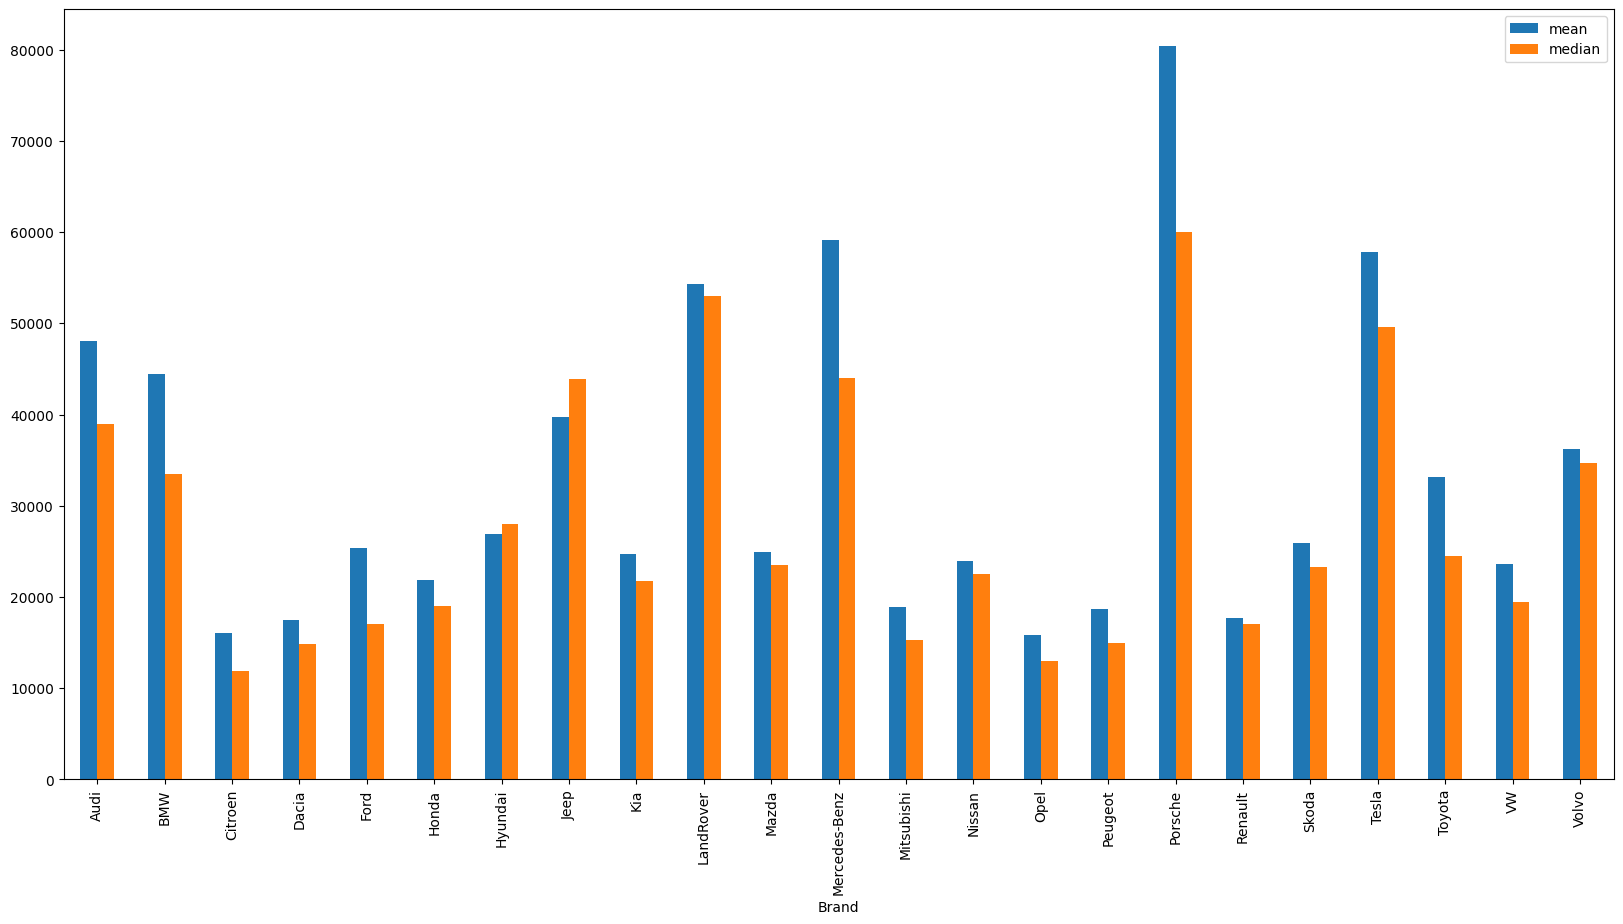

In [16]:
brand_to_price=df.groupby('Brand')[['CarPrice','Мощност']].agg(['mean','count','max','min','median'])
plt.rcParams["figure.figsize"] = (20,10)
brand_to_price['CarPrice'][brand_to_price['CarPrice']['count']>=20].plot.bar(y=['mean','median'])

<Axes: xlabel='Brand'>

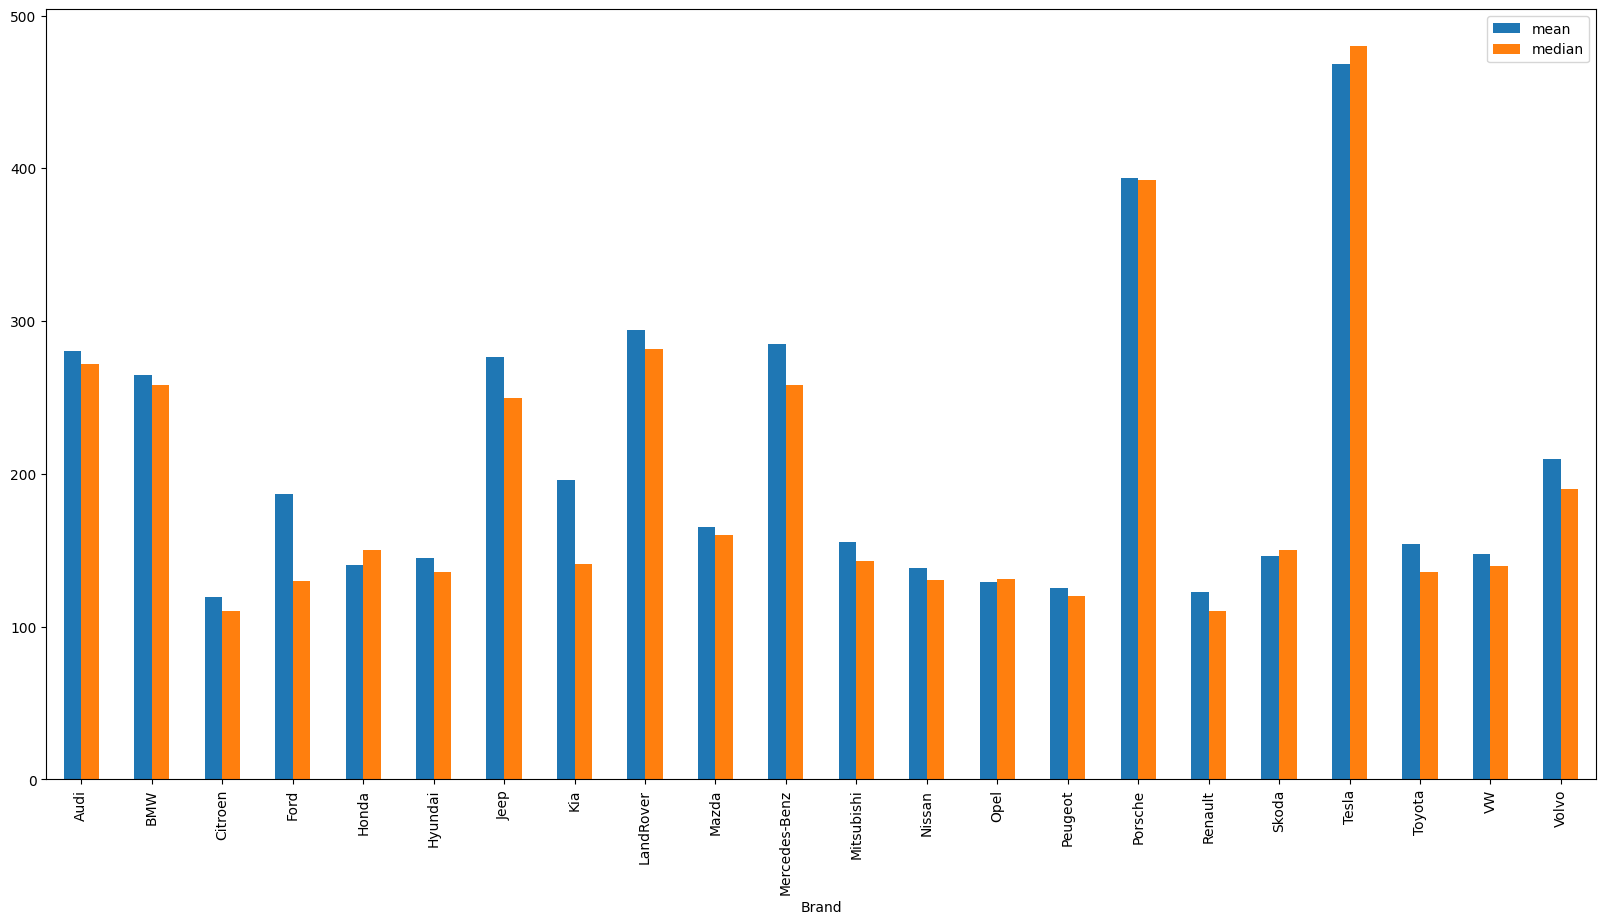

In [17]:
brand_to_price['Мощност'][brand_to_price['Мощност']['count']>=20].plot.bar(y=['mean','median'])

<Axes: ylabel='count'>

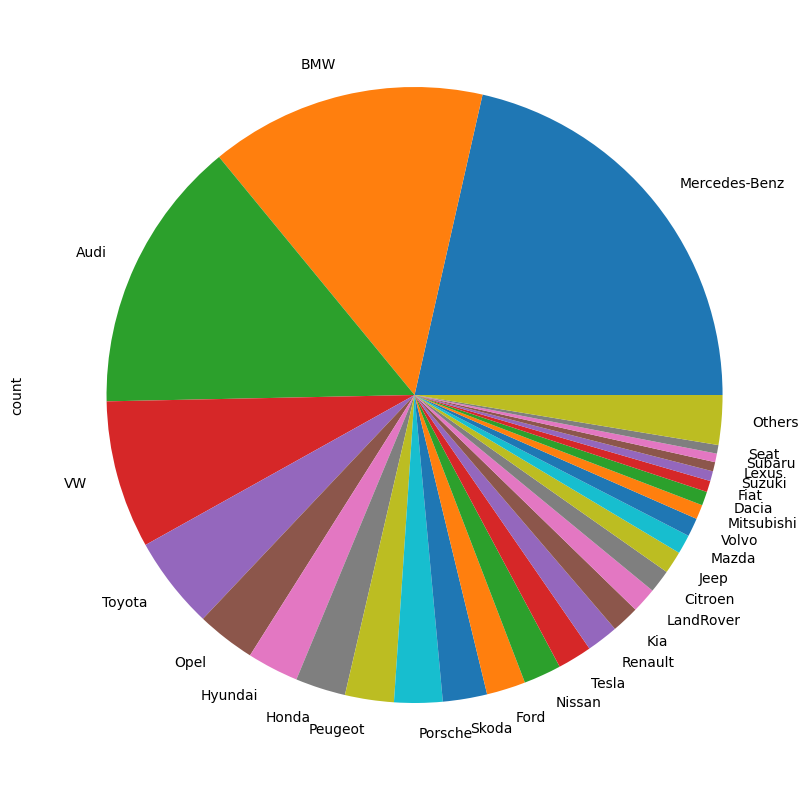

In [18]:
brands_counts=df['Brand'].value_counts()
brands_counts['Others']=brands_counts[brands_counts<=12].sum()
brands_counts[brands_counts>12].plot.pie()

<Axes: ylabel='count'>

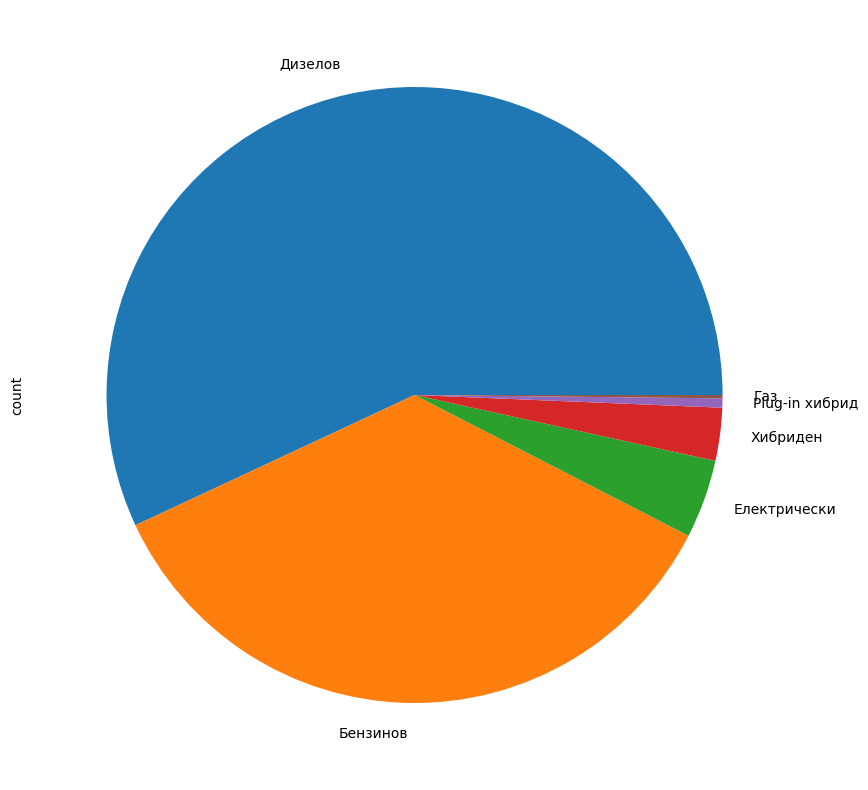

In [19]:
df['Двигател'].value_counts().plot.pie()

array([<Axes: title={'center': '(CarPrice, mean)'}, xlabel='Двигател'>,
       <Axes: title={'center': '(CarPrice, median)'}, xlabel='Двигател'>,
       <Axes: title={'center': '(Мощност, mean)'}, xlabel='Двигател'>,
       <Axes: title={'center': '(Мощност, median)'}, xlabel='Двигател'>],
      dtype=object)

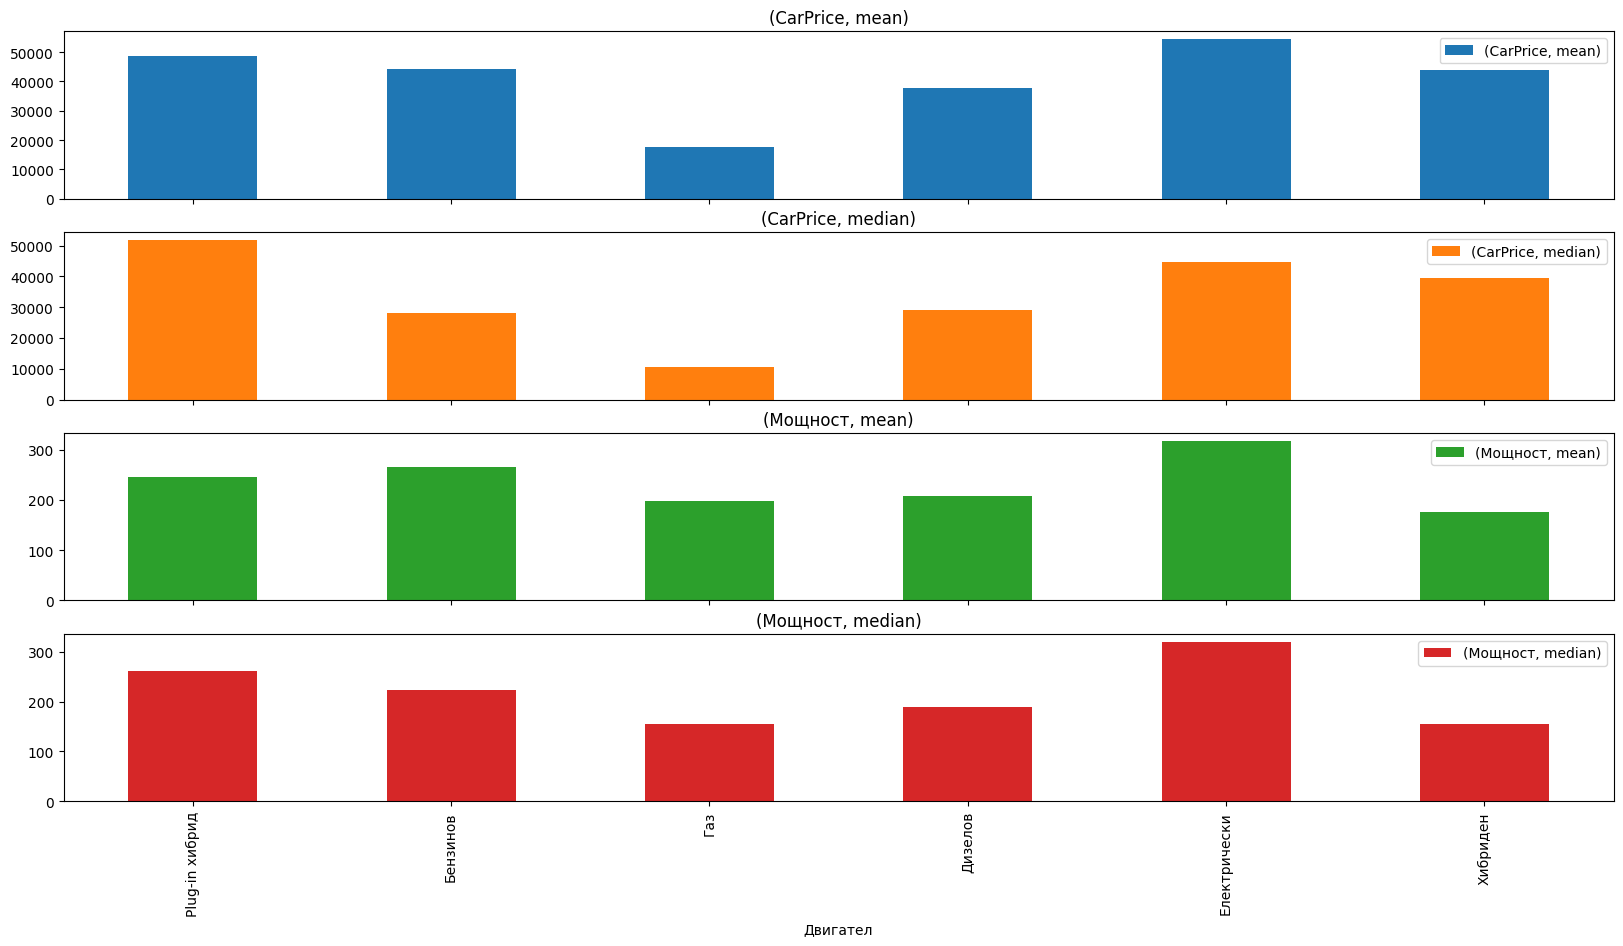

In [20]:
df.groupby('Двигател')[['CarPrice','Мощност']].agg(['mean','median']).plot.bar(subplots=True)


<Axes: xlabel='Цвят'>

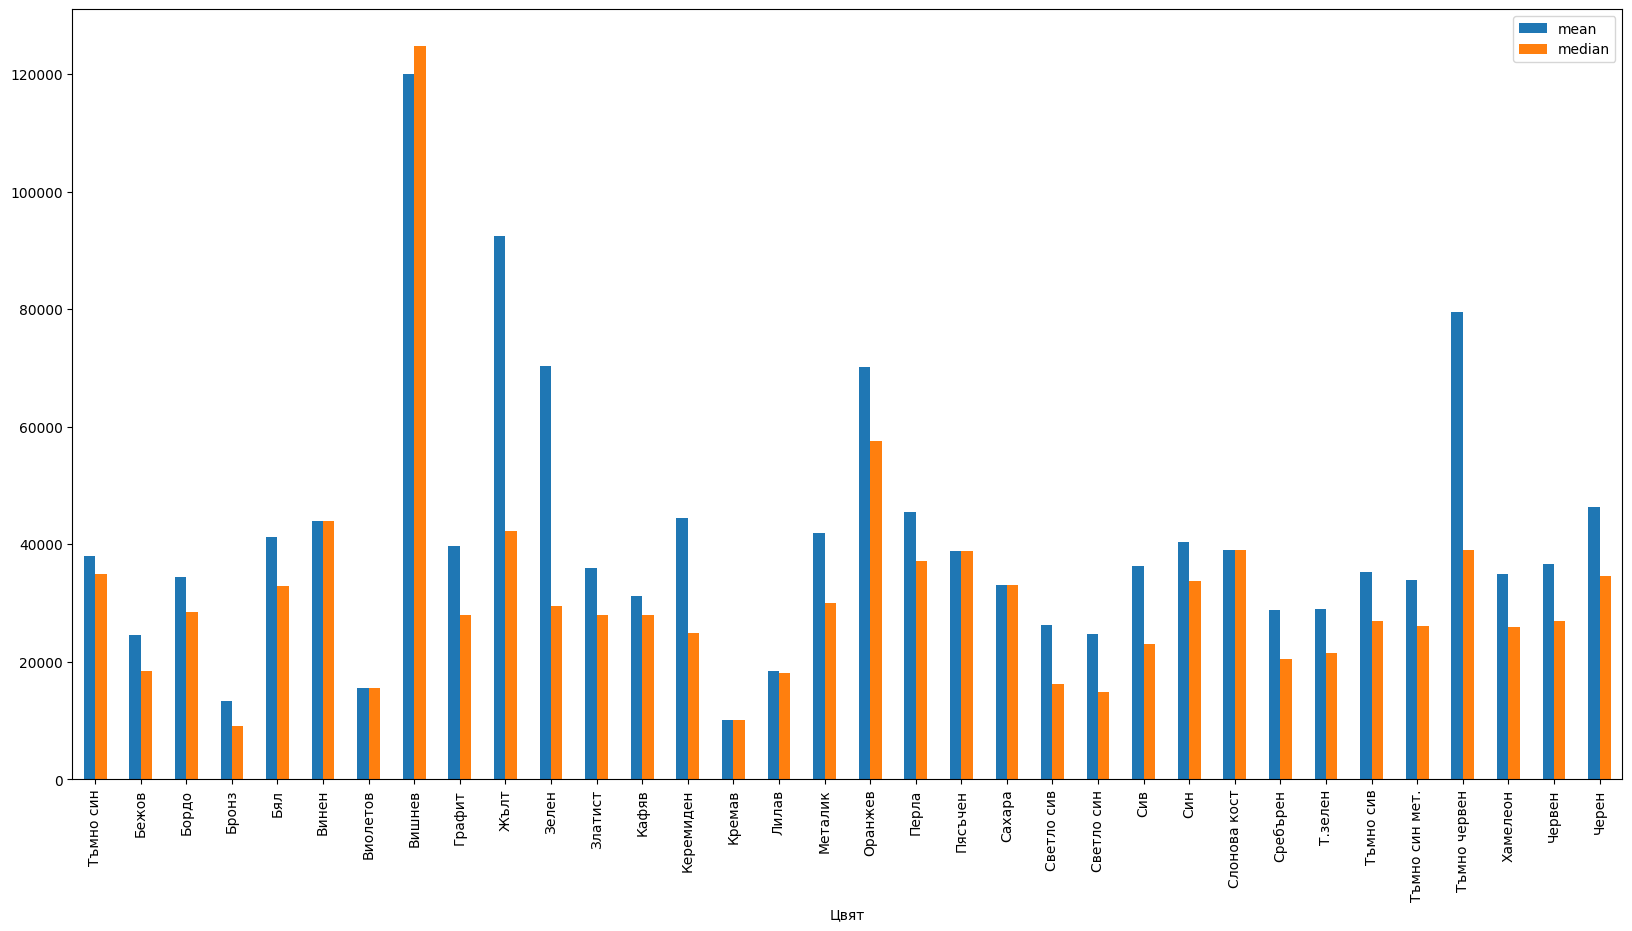

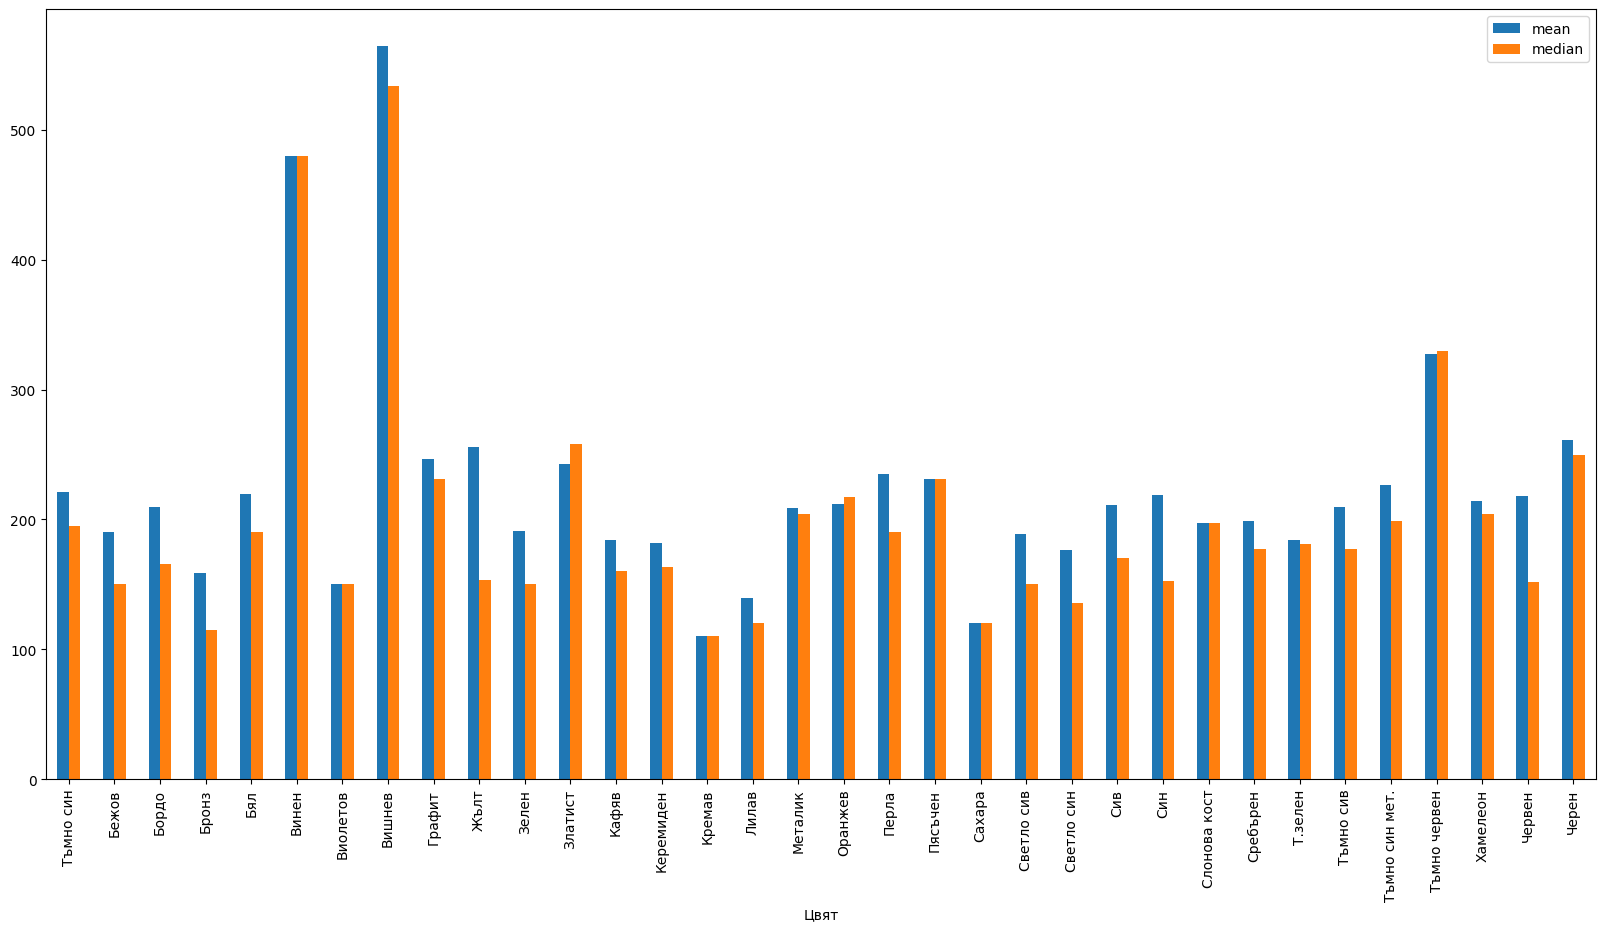

In [21]:
color_to_other=df.groupby('Цвят')[['CarPrice','Мощност']].agg(['mean','median'])
color_to_other['CarPrice'].plot.bar()
color_to_other['Мощност'].plot.bar()

<Axes: ylabel='Скоростна кутия'>

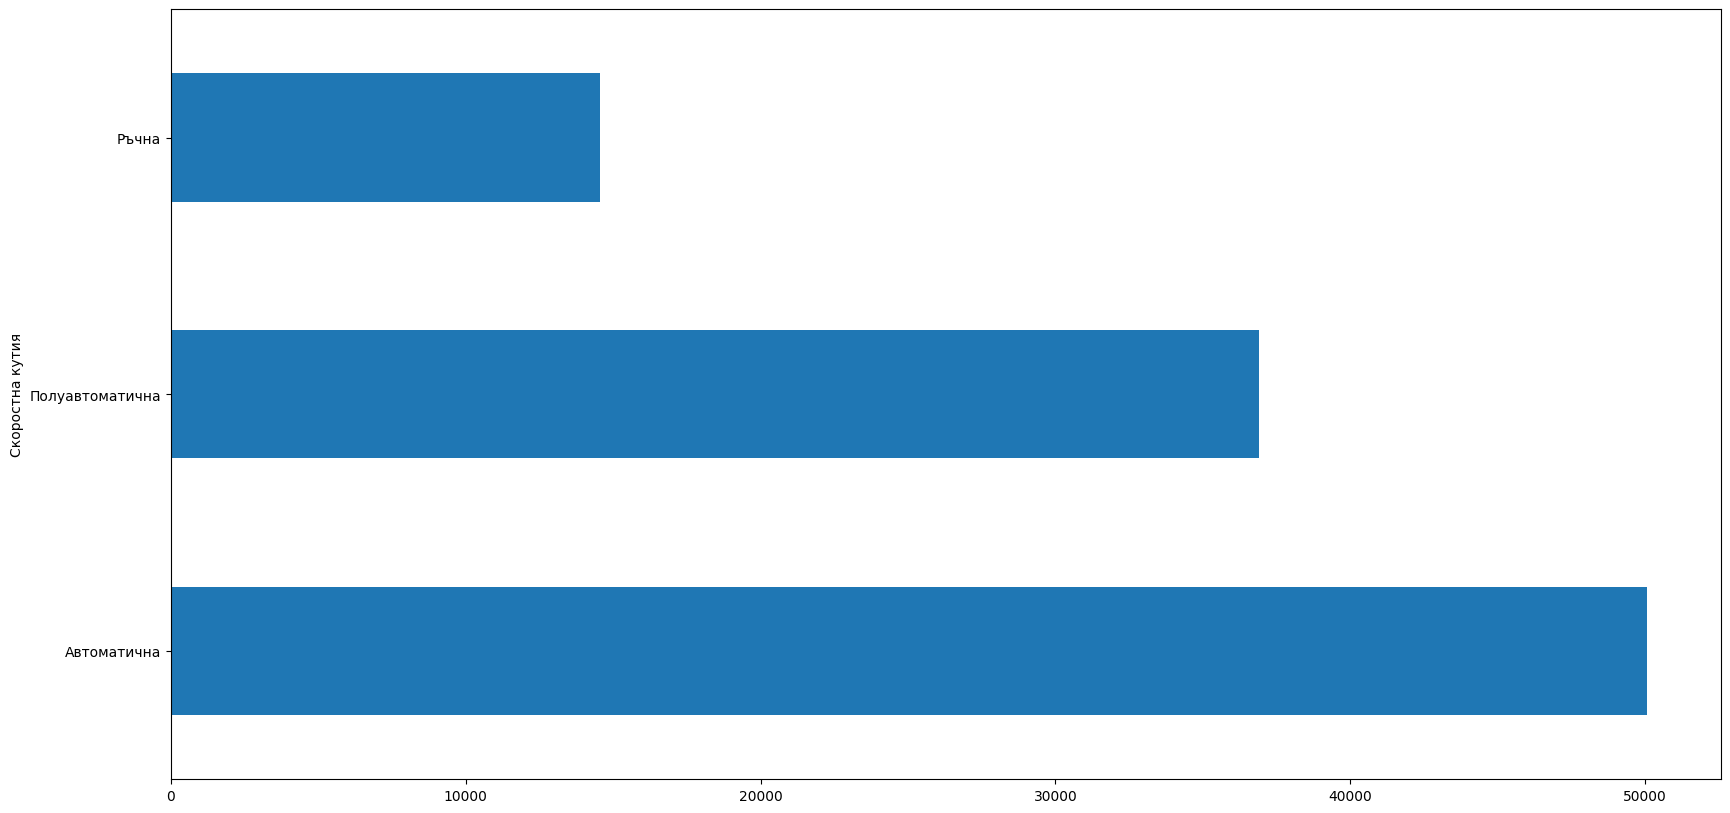

In [22]:
df.groupby('Скоростна кутия')['CarPrice'].mean().plot.barh()

<Axes: xlabel='Категория'>

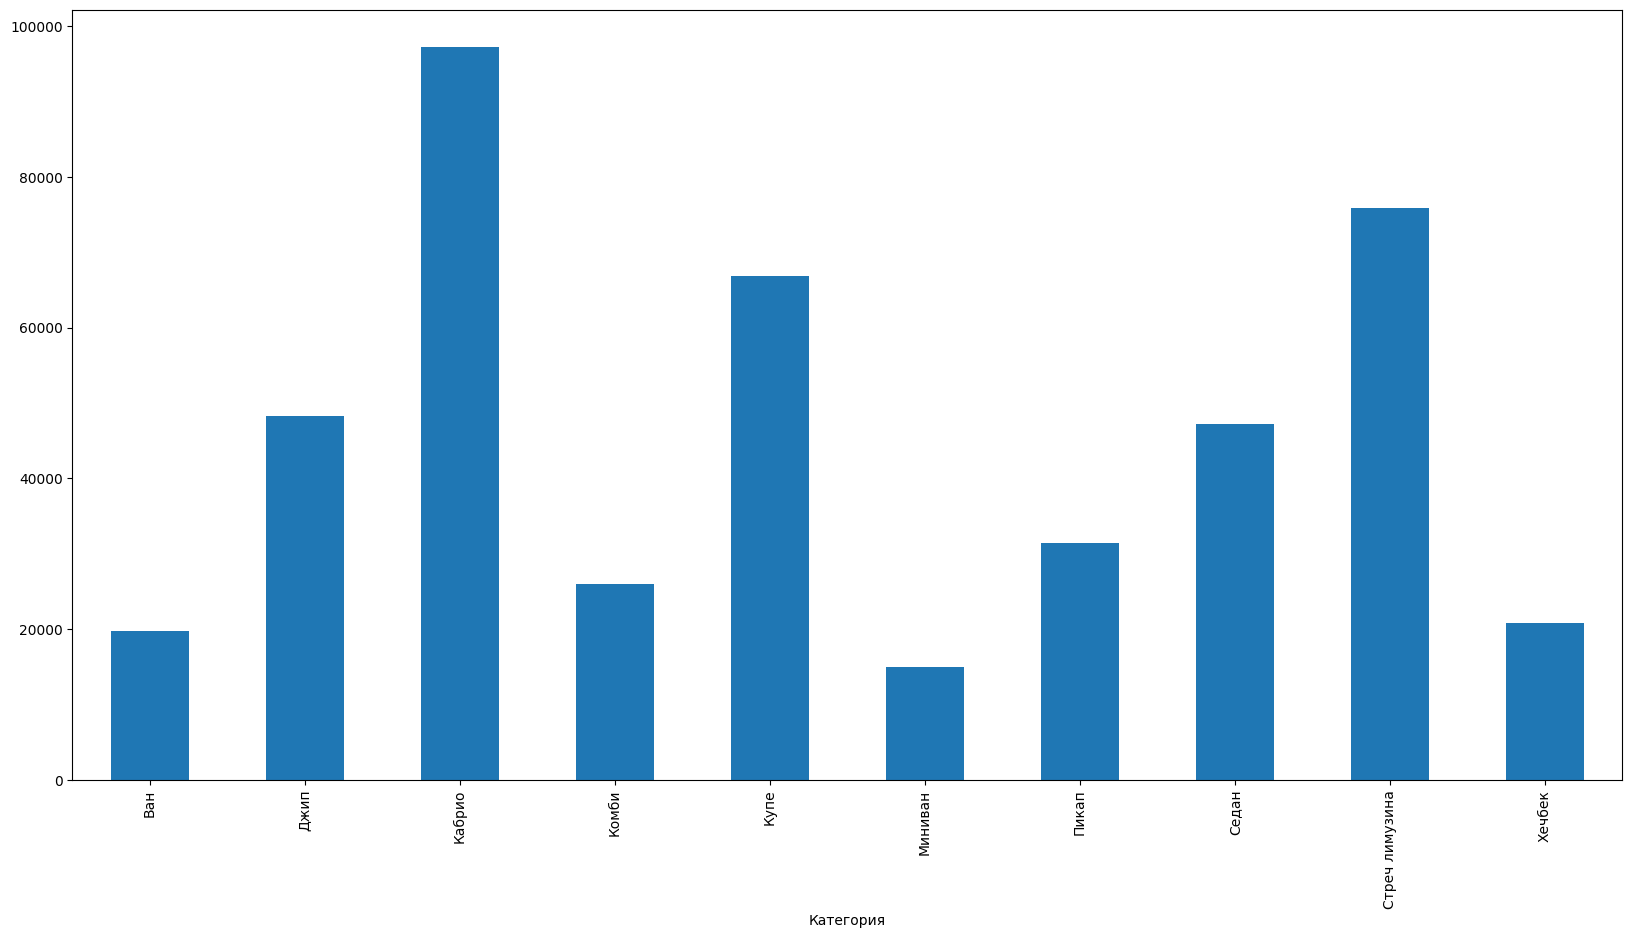

In [23]:
df.groupby('Категория')['CarPrice'].mean().plot.bar()

<Axes: xlabel='Year'>

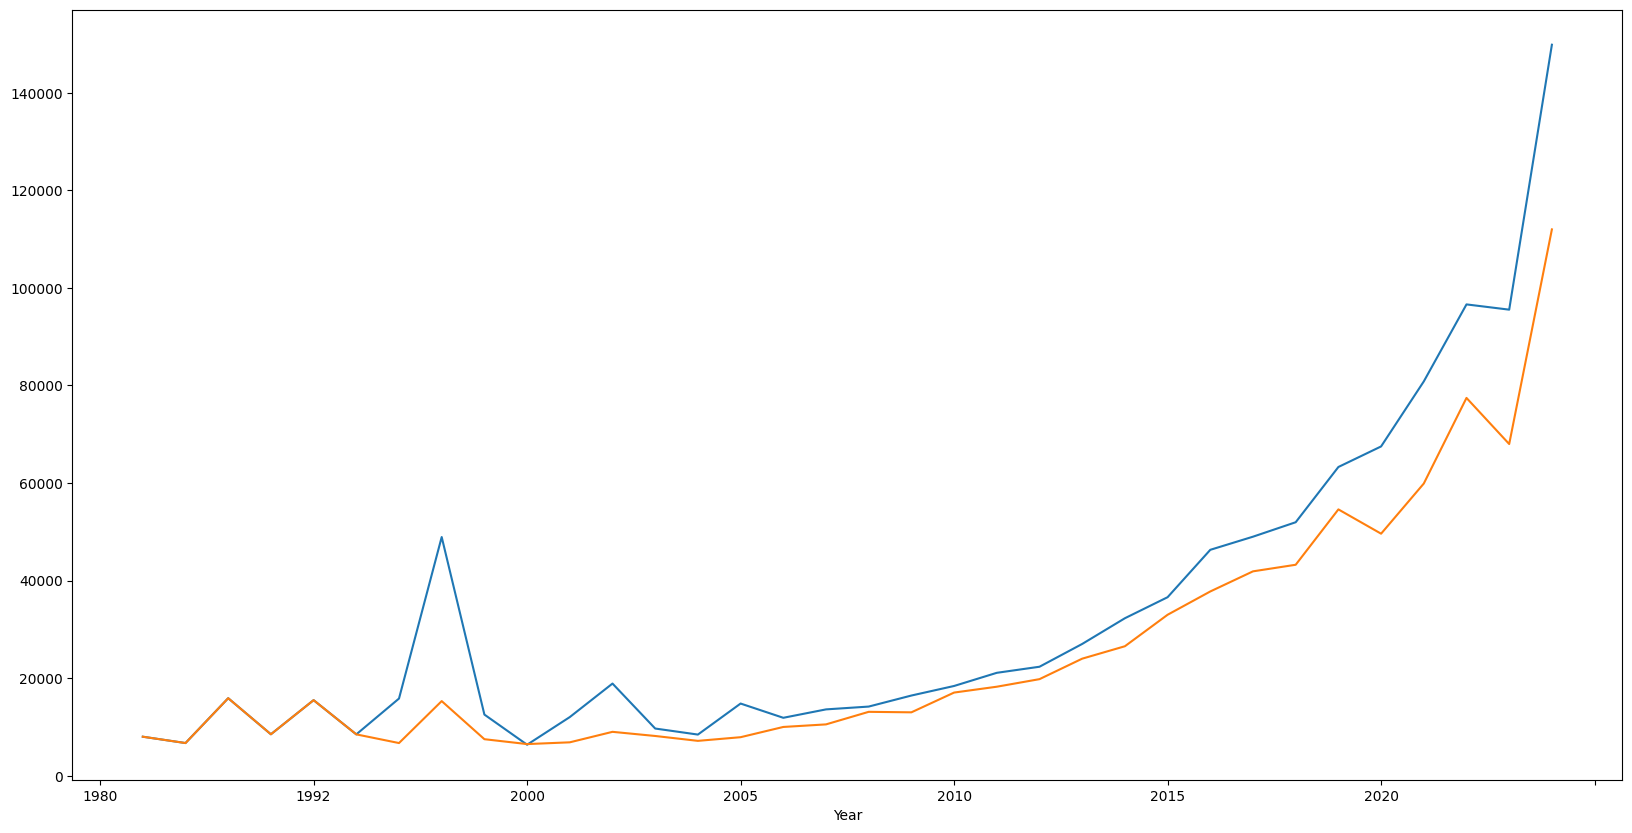

In [24]:
df.groupby('Year')['CarPrice'].mean().plot.line()
df.groupby('Year')['CarPrice'].median().plot.line()

<Axes: xlabel='Region'>

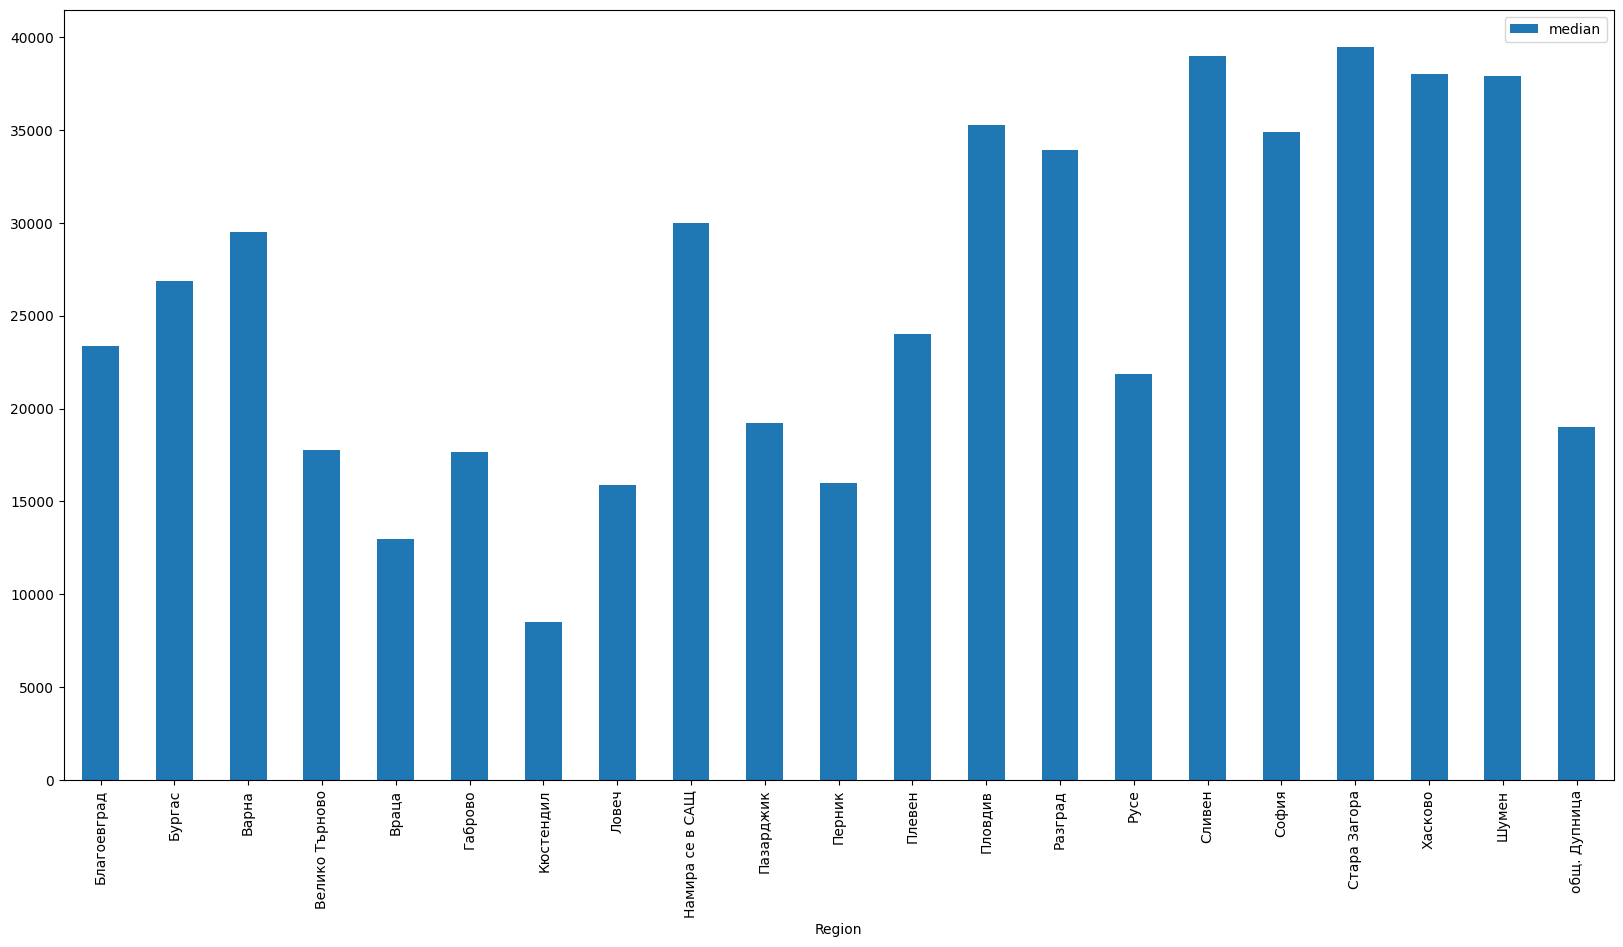

: 

In [25]:
region_to_car_price=df.groupby('Region')['CarPrice'].agg(['median','mean','count'])
region_to_car_price[region_to_car_price['count']>10].plot.bar(y='median')